In [53]:
import numpy as np
import matplotlib.pyplot as plt

In [54]:
def print_graph_with_thresholds(values, thresholds):
    plt.figure()
    plt.xlim(0, len(values))
    plt.ylim(0, 1)
    plt.plot(values)
    plt.plot(thresholds)
    plt.show()
    
def print_graph(values):
    plt.figure()
    plt.xlim(0, len(values))
    plt.ylim(0, 1)
    plt.plot(values)
    plt.show()

#0 command


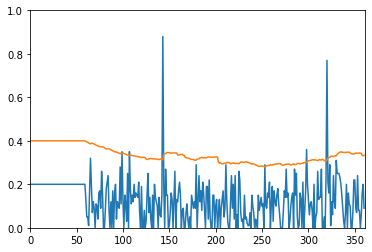


#1 command


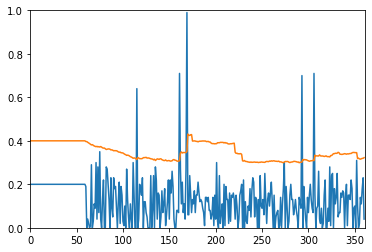


#2 command


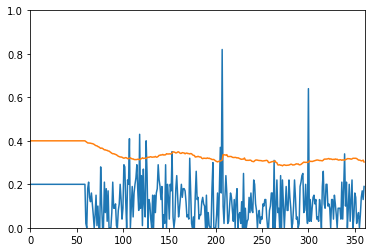


#3 command


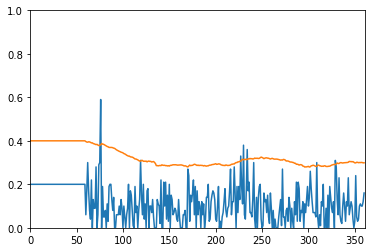

In [57]:
multiple = 1.6449 # 10% 기준 확률 모델링
length = 60 # 평균과 표준편차 계산을 위한 기간
cmd_count = 4 # 명령어 개수

upper_bound = 0.8 # threshold 최댓값
lower_bound = 0.2 # threshold 최솟값
default_threshold = 0.4 # threshold 기본값 제시
min_gap_threshold = 0.2 # 최소 밴드 너비

arr_of_data1 = [ lower_bound for _ in range(length) ]
arr_of_data2 = [ lower_bound for _ in range(length) ]
arr_of_data3 = [ lower_bound for _ in range(length) ]
arr_of_data4 = [ lower_bound for _ in range(length) ]

with open("data.csv", "r") as f:
    for idx, line in enumerate(f.readlines()):
        if idx > length * 5: # for test
            break
            
        line.replace("\n", "")
        if line == "":
            continue
        data1, data2, data3, data4 = line.split(',')
        
        arr_of_data1.append(float(data1))
        arr_of_data2.append(float(data2))
        arr_of_data3.append(float(data3))
        arr_of_data4.append(float(data4))

arr_of_scores = [ arr_of_data1, arr_of_data2, arr_of_data3, arr_of_data4 ]
arr_of_thresholds = []

for idx, scores in enumerate(arr_of_scores):
    scores = np.array(scores)
    
    thresholds = [ default_threshold for _ in range(length) ]
    values = np.array([ sum(scores[i-length+1:i]) / length for i in range(length, len(scores)) ]) \
            + np.array([ max(min_gap_threshold, multiple * np.std(scores[i-length+1:i])) for i in range(length, len(scores))])
    values = [ max(0.2, min(0.8, value)) for value in values ]
    thresholds += values

    arr_of_thresholds.append(thresholds)
    
    print("#" + str(idx) + " command")
    print_graph_with_thresholds(scores, thresholds)
    print()
    

#0 command


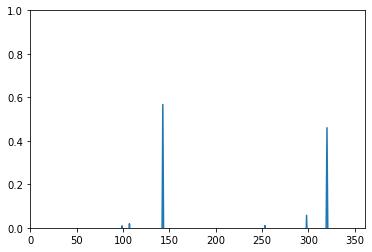


#1 command


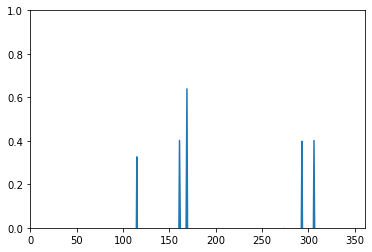


#2 command


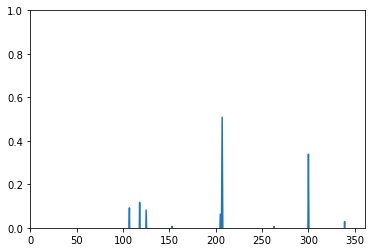


#3 command


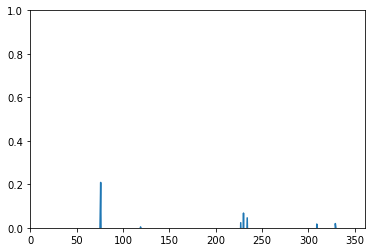

In [58]:
arr_of_results = []

for i in range(cmd_count):
    results = np.array(arr_of_scores[i]) - np.array(arr_of_thresholds[i])
    arr_of_results.append(results)
    
    print("#" + str(i) + " command")
    print_graph(results)
    print()
    

In [49]:
# 비교적 약한 신호들에 대해서 이전 강한 신호에 대한 decay rate 적용하는 방안은 어떨 것인가..
# 총 5초 정도의 바운더리로 생각